# LunAPI : staging

Links to notebooks in this repository: [Index](./00_overview.ipynb) | [Individuals](./01_indivs.ipynb) | [Projects](./02_projects.ipynb) | [Staging](./03_staging.ipynb) | [Models](./04_models.ipynb) | [Advanced](./98_advanced.ipynb) | [Reference](./99_reference.ipynb)

This page is under development - currently it only contains rough notes.

In [1]:
import lunapi as lp
proj = lp.proj()

initiated lunapi v0.0.4 <lunapi.lunapi0.luna object at 0xffff7bc1cfb0> 

enabling console outputs


In [2]:
proj.build( [ '/tutorial/' , '-ext=-profusion.xml' ] )

3

In [3]:
proj.sample_list()

[('learn-nsrr01',
  '/tutorial/edfs/learn-nsrr01.edf',
  {'/tutorial/edfs/learn-nsrr01-profusion.xml'}),
 ('learn-nsrr02',
  '/tutorial/edfs/learn-nsrr02.edf',
  {'/tutorial/edfs/learn-nsrr02-profusion.xml'}),
 ('learn-nsrr03',
  '/tutorial/edfs/learn-nsrr03.edf',
  {'/tutorial/edfs/learn-nsrr03-profusion.xml'})]

In [4]:
p = proj.inst( 1 )

___________________________________________________________________
Processing: learn-nsrr02 | /tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


In [5]:
## Basic usage (single channel EEG)

In [6]:
p.pops( 'EEG' )

 ..................................................................
 CMD #1: COPY
   options: sig=EEG tag=FLT
 copying EEG to EEG_FLT
 ..................................................................
 CMD #2: FILTER
   options: bandpass=0.3,35 ripple=0.01 sig=EEG_FLT tw=0.2
  filtering channel(s): EEG_FLT
 ..................................................................
 CMD #3: COPY
   options: sig=EEG_FLT tag=NORM
 copying EEG_FLT to EEG_FLT_NORM
 ..................................................................
 CMD #4: ROBUST-NORM
   options: epoch sig=EEG_FLT_NORM winsor=0.002
  set epochs to default 30 seconds, 1195 epochs
  iterating over epochs
  robust standardization of 1 signals, winsorizing at 0.002
 ..................................................................
 CMD #5: EDGER
   options: cache=ec1 sig=EEG_FLT
  skipping... cache ec1 not found for this individual...
  set 0 leading/trailing sleep epochs to '?' (given end-wake=120 and end-sleep=5)
  anchoring on sle

,PP_N1,PP_N2,PP_N3,PP_R,PP_W
0,0.000609,0.000331,0.000067,0.000108,0.998885
1,0.000571,0.000295,0.000062,0.000096,0.998975
2,0.000783,0.000401,0.00007,0.00013,0.998616
3,0.001172,0.000543,0.00007,0.00015,0.998065
4,0.001731,0.000896,0.00009,0.000213,0.997071
...,...,...,...,...,...
1190,None,None,None,None,None
1191,None,None,None,None,None
1192,None,None,None,None,None
1193,None,None,None,None,None


### Predictions

In [7]:
stgs = p.table( 'POPS' , 'E' ) 
stgs

,ID,E,CONF,FLAG,PP_N1,PP_N2,PP_N3,PP_R,PP_W,PRED,PRIOR,START,STOP
0,learn-nsrr02,1,0.998885,0,0.000609,0.000331,0.000067,0.000108,0.998885,W,W,21:18:06,21:18:36
1,learn-nsrr02,2,0.998975,0,0.000571,0.000295,0.000062,0.000096,0.998975,W,W,21:18:36,21:19:06
2,learn-nsrr02,3,0.998616,0,0.000783,0.000401,0.00007,0.00013,0.998616,W,W,21:19:06,21:19:36
3,learn-nsrr02,4,0.998065,0,0.001172,0.000543,0.00007,0.00015,0.998065,W,W,21:19:36,21:20:06
4,learn-nsrr02,5,0.997071,0,0.001731,0.000896,0.00009,0.000213,0.997071,W,W,21:20:06,21:20:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,learn-nsrr02,1191,None,-1,None,None,None,None,None,None,None,07:13:06,07:13:36
1191,learn-nsrr02,1192,None,-1,None,None,None,None,None,None,None,07:13:36,07:14:06
1192,learn-nsrr02,1193,None,-1,None,None,None,None,None,None,None,07:14:06,07:14:36
1193,learn-nsrr02,1194,None,-1,None,None,None,None,None,None,None,07:14:36,07:15:06


### Stage statistics

In [8]:
p.table( 'POPS' , 'SS' )

,ID,SS,F1,OBS,ORIG,PR1,PREC,PRF,RECALL
0,learn-nsrr02,?,None,122.5,122.5,122.5,None,122.5,None
1,learn-nsrr02,N1,0.324324,5.5,5.5,13.0,0.230769,24.439146,0.545455
2,learn-nsrr02,N2,0.871863,199.0,199.0,179.5,0.91922,173.435803,0.829146
3,learn-nsrr02,N3,0.902062,92.5,92.5,101.5,0.862069,99.116627,0.945946
4,learn-nsrr02,R,0.827004,60.0,60.0,58.5,0.837607,59.900515,0.816667
5,learn-nsrr02,W,0.931393,118.0,118.0,122.5,0.914286,118.10791,0.949153


### Model performance

In [9]:
p.table( 'POPS' ).T

,0
ID,learn-nsrr02
ACC,0.876842
ACC3,0.924211
CONF,0.832153
F1,0.771329
F13,0.899725
F1_WGT,0.880526
K,0.828978
K3,0.857905
MCC,0.830441


### Hypnogram plots

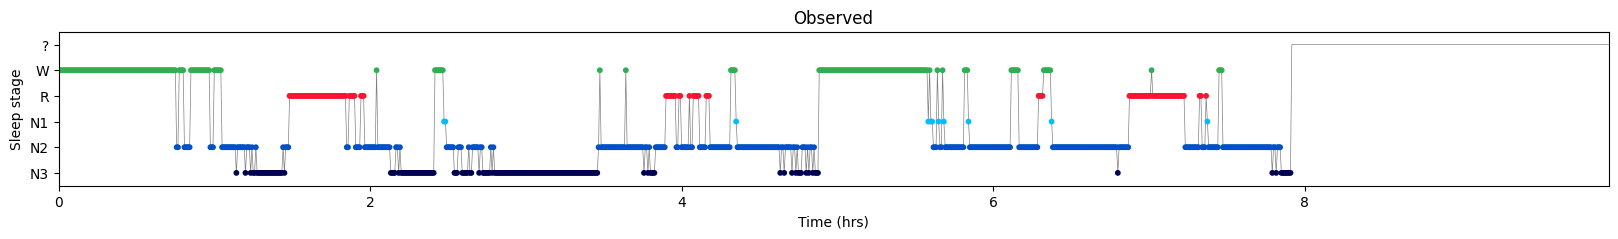

In [10]:
lp.hypno( ss = stgs['PRIOR'] , title = "Observed" ) 

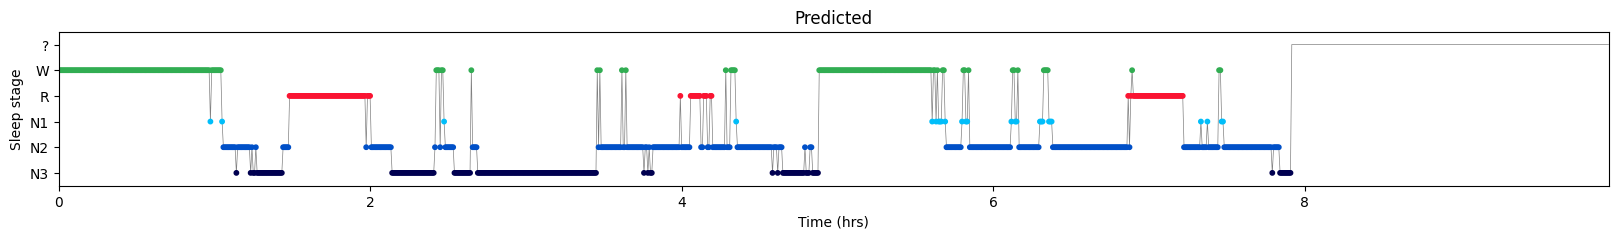

In [11]:
lp.hypno( ss = stgs['PRED'] , title = "Predicted" ) 

### Hypnodensity plots

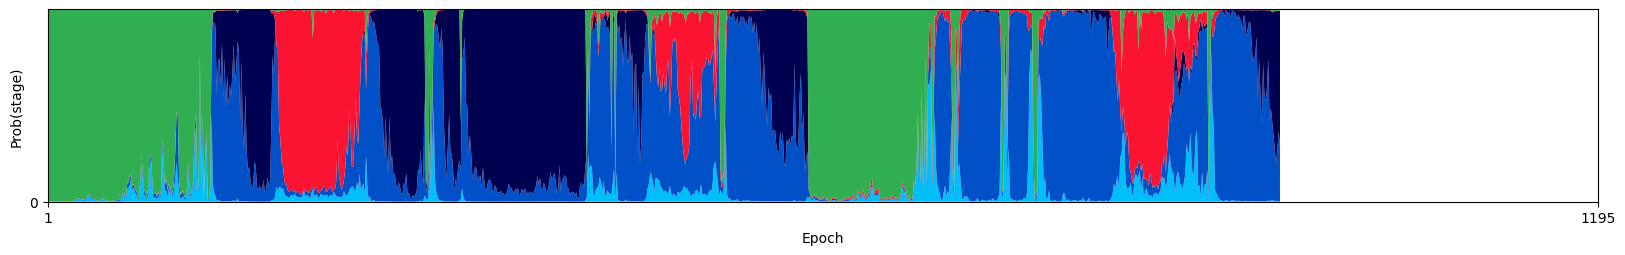

In [12]:
lp.hypno_density( stgs )

### Project-level invocation

In [13]:
proj.silence()
proj.pops( 'EEG' )

silencing console outputs


,PP_N1,PP_N2,PP_N3,PP_R,PP_W
0,None,None,None,None,None
1,0.000609,0.000331,0.000067,0.000108,0.998885
2,0.001253,0.004371,0.000502,0.000576,0.993297
3,None,None,None,None,None
4,0.000571,0.000295,0.000062,0.000096,0.998975
...,...,...,...,...,...
3918,None,None,None,None,None
3919,None,None,None,None,None
3920,None,None,None,None,None
3921,None,None,None,None,None


In [16]:
proj.strata()

,Command,Stata
0,EDGER,BL
1,EDGER,CH
2,POPS,BL
3,POPS,E
4,POPS,ETYPE
5,POPS,ETYPE_SS
6,POPS,FTR
7,POPS,OBS_PRED
8,POPS,SS


In [15]:
proj.table( 'POPS' ) 

,ID,ACC,ACC3,CONF,F1,F13,F1_WGT,K,K3,MCC,...,PREC,PREC3,PREC_WGT,RECALL,RECALL3,RECALL_WGT,REM_LAT_OBS,REM_LAT_PRD,SLP_LAT_OBS,SLP_LAT_PRD
0,learn-nsrr01,0.705714,0.812381,0.715876,0.493104,0.774243,0.692852,0.557195,0.658504,0.562446,...,0.502254,0.767463,0.697966,0.545143,0.787402,0.705714,55.5,123.0,26.5,41.5
1,learn-nsrr02,0.876842,0.924211,0.832153,0.771329,0.899725,0.880526,0.828978,0.857905,0.830441,...,0.75279,0.899157,0.888584,0.817273,0.900615,0.876842,43.5,30.5,45.5,58.5
2,learn-nsrr03,0.669924,0.751357,0.781646,NaN,NaN,NaN,0.454372,0.511217,0.495097,...,0.429245,0.549692,0.767251,NaN,NaN,NaN,None,93.0,56.0,58.0


## Options

`pops()` has several options.

TODO: currently, only project-wrapper has all these; need to sync indiv. and proj. functions: 

| Option | Default |Description |
|----|----|----|
| `s` | None | EEG label for signal channel |
| `do_edger` | `True` | Run `EDGER` prior to fitting |
| `no_filter` | `False` | Assume signals are already bandpass filtered |
| `do_reref` | `False` | Perform re-referencing |
| `m` | None | Mastoid channel (if `do_reref=True`)|

The multi-channel version is as above, expcept `s` and `m` are replacede with `s1`, `s2` and `m1`, `m2`.


## Notes

If the POPS training data are located elsewhere (i.e. if not running in a remnrem/lunapi docker context), you can point to the enclosing folder by setting this variable before running `p.pops()`